# Comparison: Custom Lasso Homotopy vs. scikit-learn Lasso

This notebook generates synthetic regression data, fits both the custom Lasso Homotopy model and scikit-learn's Lasso, and then compares their coefficients and prediction accuracy. Mak


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from LassoHomotopy import LassoHomotopyModel

In [35]:
# Generate synthetic regression data
np.random.seed(3)
n_samples, n_features = 200, 20
X = np.random.randn(n_samples, n_features)

In [36]:
# True coefficients (sparse): only indices 0, 2 y 4 are nonzero
true_coef = np.array([2, 1, 0, 0, 1, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, -2, 0])
y = X @ true_coef + np.random.randn(n_samples) * 0.1

In [37]:
# Train the custom Lasso Homotopy model 
custom_model = LassoHomotopyModel(mu=0.1)
custom_results = custom_model.fit(X, y)
custom_predictions = custom_results.predict(X)
custom_coef = custom_model.coef_

In [38]:
# Train scikit-learn's Lasso model for comparison
sk_model = Lasso(alpha=0.1, max_iter=10000, random_state=42)
sk_model.fit(X, y)
sk_predictions = sk_model.predict(X)
sk_coef = sk_model.coef_

In [39]:
# Compare Mean Squared Error (MSE) of predictions
mse_custom = mean_squared_error(y, custom_predictions)
mse_sk = mean_squared_error(y, sk_predictions)

print("True coefficients:")
print(true_coef)
print("\nCustom Lasso Homotopy Coefficients:")
print(custom_coef)
print("\nscikit-learn Lasso Coefficients:")
print(sk_coef)
print("\nMSE (Custom Lasso Homotopy):", mse_custom)
print("MSE (scikit-learn Lasso):", mse_sk)

True coefficients:
[ 2  1  0  0  1  0  0 -1  0  0  0  0  1  0  0  3  0  0 -2  0]

Custom Lasso Homotopy Coefficients:
[ 1.98575839e+00  9.97600577e-01 -1.05012057e-02  1.30755528e-02
  9.99561751e-01  6.29742915e-04 -1.25216605e-06 -9.95261128e-01
 -4.71939822e-03 -4.64621487e-03 -6.40467981e-03  4.28953748e-03
  9.98592657e-01 -5.46378975e-04  9.50633419e-03  2.99771793e+00
 -5.52707477e-03  0.00000000e+00 -1.99263173e+00  7.23841852e-03]

scikit-learn Lasso Coefficients:
[ 1.85482847  0.8745714   0.         -0.          0.89639801  0.
 -0.         -0.83307216 -0.          0.         -0.          0.
  0.90062627  0.          0.          2.8864503  -0.          0.
 -1.91785891  0.        ]

MSE (Custom Lasso Homotopy): 0.008154518419420524
MSE (scikit-learn Lasso): 0.0900500851582855


In [40]:
# Check sparsity: count nearly zero coefficients using a threshold 
threshold = 1e-2
sparse_custom = np.sum(np.abs(custom_coef) < threshold)
sparse_sk = np.sum(np.abs(sk_coef) < threshold)
print("\nNumber of nearly zero coefficients (Custom):", sparse_custom)
print("Number of nearly zero coefficients (scikit-learn):", sparse_sk)


Number of nearly zero coefficients (Custom): 11
Number of nearly zero coefficients (scikit-learn): 13


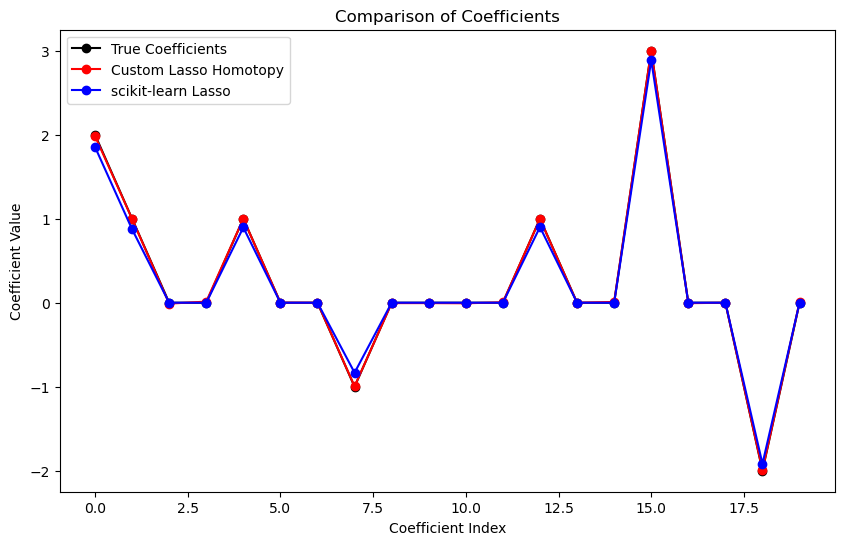

In [41]:
# Plot 1: coefficients for a visual comparison
plt.figure(figsize=(10, 6))
plt.plot(true_coef, 'ko-', label="True Coefficients")
plt.plot(custom_coef, 'ro-', label="Custom Lasso Homotopy")
plt.plot(sk_coef, 'bo-', label="scikit-learn Lasso")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Coefficients")
plt.legend()
plt.show()

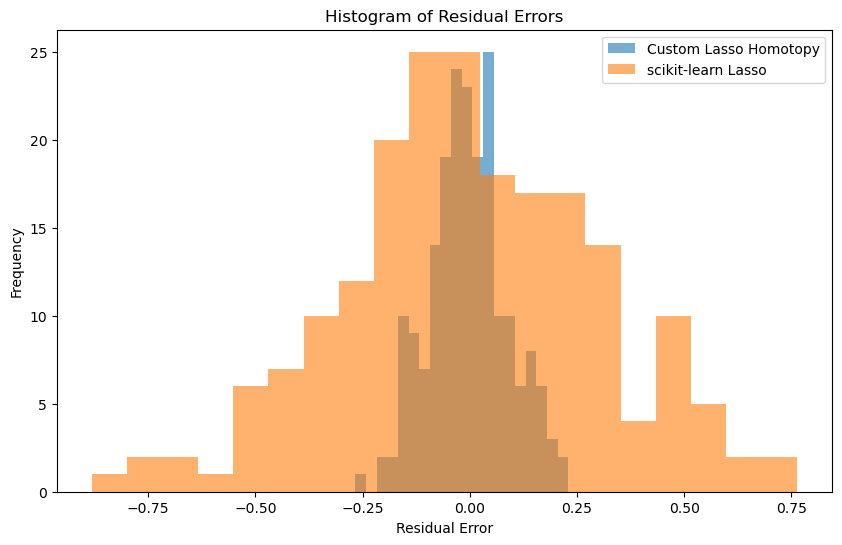

In [42]:
# Plot 2: Histogram of Residual Errors 
# Calculate the residuals for each model
residuals_custom = y - custom_predictions
residuals_sk = y - sk_predictions

plt.figure(figsize=(10, 6))
plt.hist(residuals_custom, bins=20, alpha=0.6, label="Custom Lasso Homotopy")
plt.hist(residuals_sk, bins=20, alpha=0.6, label="scikit-learn Lasso")
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.title("Histogram of Residual Errors")
plt.legend()
plt.show()

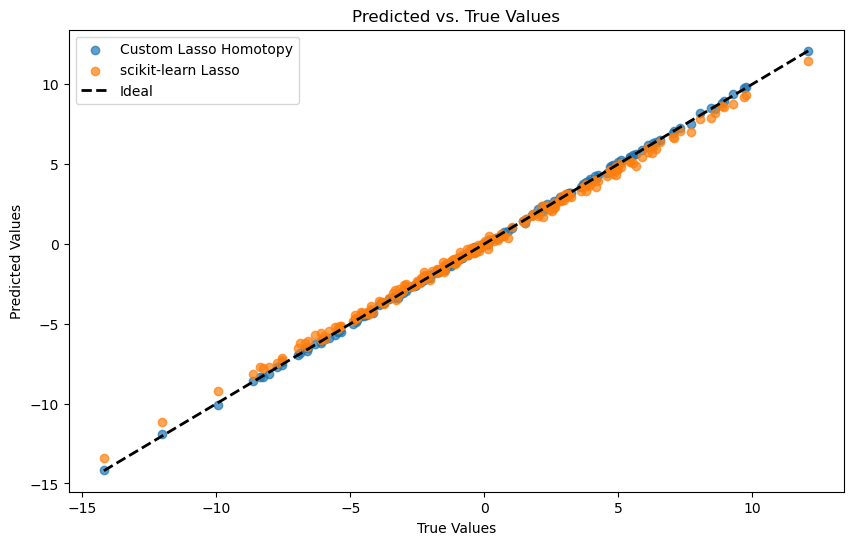

In [43]:
# Plot 3: Predicted vs. True values
plt.figure(figsize=(10, 6))
plt.scatter(y, custom_predictions, alpha=0.7, label="Custom Lasso Homotopy")
plt.scatter(y, sk_predictions, alpha=0.7, label="scikit-learn Lasso")
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2, label="Ideal")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. True Values")
plt.legend()
plt.show()

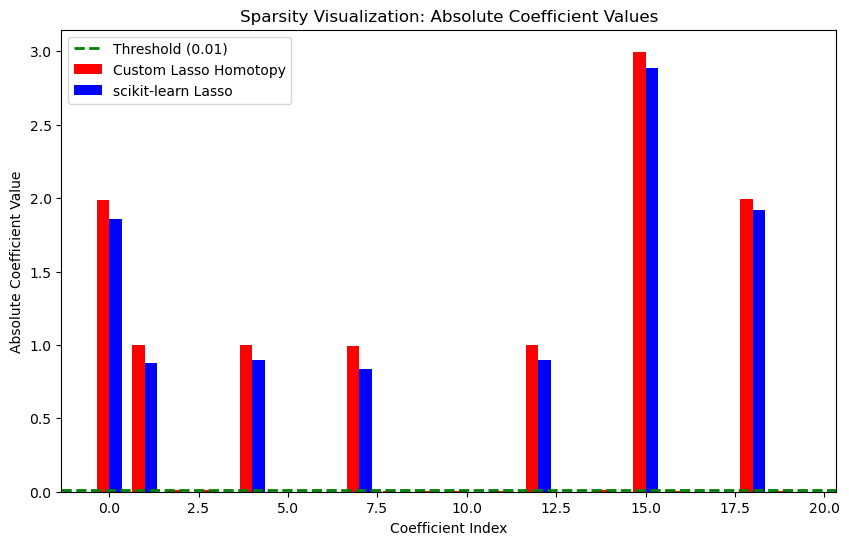

In [44]:
# Plot 4: Visualizing Sparsity through Absolute Coefficient Values 

import matplotlib.pyplot as plt

# Define a threshold to consider a coefficient as practically zero
threshold = 1e-2

indices = np.arange(n_features)
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(indices - bar_width/2, np.abs(custom_coef), bar_width, label="Custom Lasso Homotopy", color='red')
plt.bar(indices + bar_width/2, np.abs(sk_coef), bar_width, label="scikit-learn Lasso", color='blue')
plt.axhline(threshold, color='green', linestyle='--', lw=2, label=f"Threshold ({threshold})")

plt.xlabel("Coefficient Index")
plt.ylabel("Absolute Coefficient Value")
plt.title("Sparsity Visualization: Absolute Coefficient Values")
plt.legend()
plt.show()
